<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


The following describes the dataset variables in the **`boston_df`** DataFrame:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

All columns have data of type **float64**

In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### The boxplot visualizes the median value of owner-occupied homes 'MEDV'

The plot shows the median value at around **22**. This data contains a particularly high number of outliers, suggesting that more investigation is required in determining its reason.

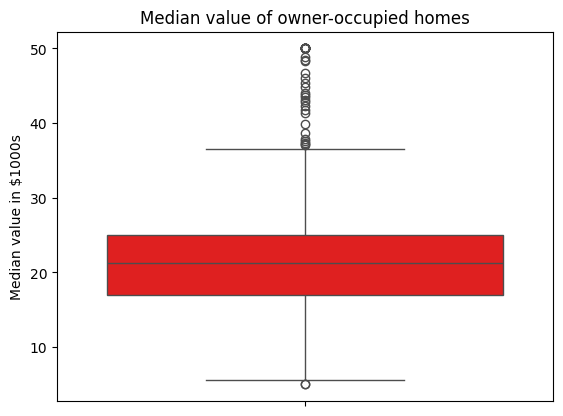

In [23]:
sns.boxplot(y='MEDV', color='red', data=boston_df)
pyplot.title('Median value of owner-occupied homes')
pyplot.ylabel('Median value in $1000s')
pyplot.show()

### The barplot visualizes the Charles river variable 'CHAS'

The plot clearly shows a huge difference, where the number houses that are not river bound outnumber the one that are by more than 10 times. The raw numbers suggest roughly 470 houses are not river bound, while only around 30 are.

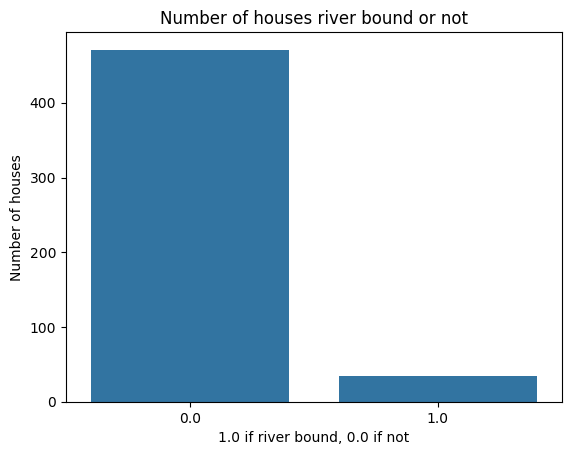

In [51]:
sns.barplot(x=boston_df.CHAS.value_counts().index, y=boston_df.CHAS.value_counts())
pyplot.title('Number of houses river bound or not')
pyplot.ylabel('Number of houses')
pyplot.xlabel('1.0 if river bound, 0.0 if not')
pyplot.show()

### The box plot visualizes the median value of owner-occupied homes 'MEDV' for three age groups ('AGE') namely `35 years and less`, `between 35 and 70 years`, and `70 years and more`

The boxplot show that median values of newer houses is much higher compared to the older ones. The values for the age groups of 35 years and less, and between 35 and 70 years are still not much different, but the ones more than 70 years old have a clear disadvantage with much lower median values.

In [10]:
# Dividing 'AGE' for the given age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and less'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and more'

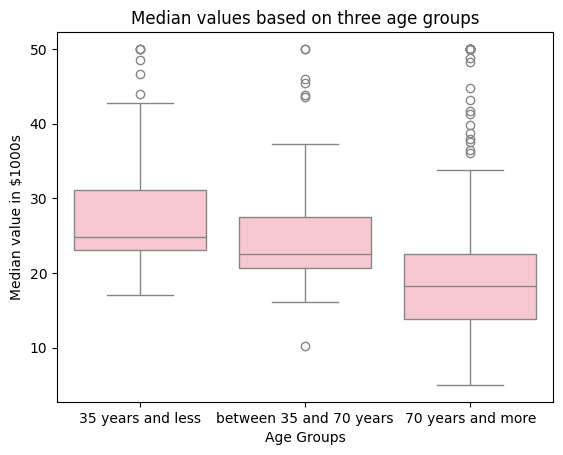

In [52]:
sns.boxplot(y='MEDV', x='age_group', color='pink', order=['35 years and less','between 35 and 70 years', '70 years and more'], data=boston_df)
pyplot.title('Median values based on three age groups')
pyplot.ylabel('Median value in $1000s')
pyplot.xlabel('Age Groups')
pyplot.show()

### The scatter plot shows the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

The scatter plot suggests that the towns with less non-retail business area tends to have lower Nitric oxide levels, and the nox levels increases with the increase in occupied area.

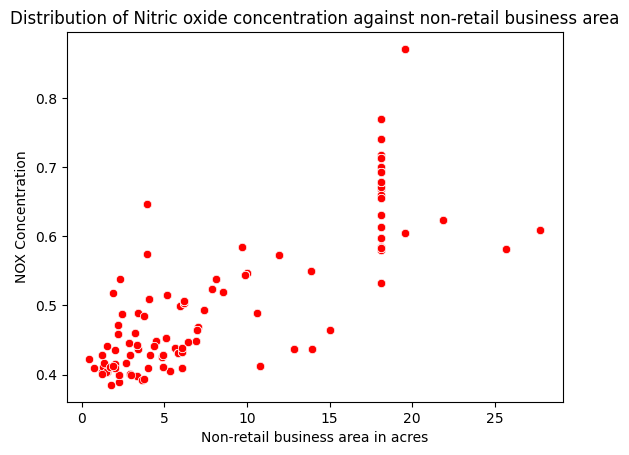

In [53]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='red')
pyplot.title('Distribution of Nitric oxide concentration against non-retail business area')
pyplot.ylabel('NOX Concentration')
pyplot.xlabel('Non-retail business area in acres')
pyplot.show()

### The histogram visualizes the pupil to teacher variable 'PTRATIO'

The histogram shows that the most common ratio is around 20, whereas roughly equal number of towns have a ratio between 17 and 19.

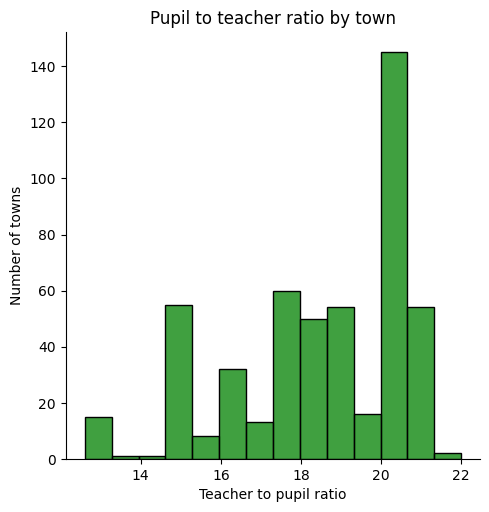

In [57]:
sns.displot(boston_df['PTRATIO'], color='green')
pyplot.title('Pupil to teacher ratio by town')
pyplot.ylabel('Number of towns')
pyplot.xlabel('Teacher to pupil ratio')
pyplot.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not?

**The Null-Hypothesis:** The median values of houses bounded by the Charles river are not significantly different\
H<sub>0</sub>: μ<sub>CHAS_1</sub> = μ<sub>CHAS_0</sub>

**The Alternative Hypothesis:** The median values of houses bounded by the Charles river are significantly different\
H<sub>a</sub>: μ<sub>CHAS_1</sub> ≠ μ<sub>CHAS_0</sub>

**The significance level:**\
α = 0.05

The p-value from the Leven Test on the CHAS variable is less than 0.05. Hence, the equal_var will be set to `False` in the t-test.

**Conclusion:**\
Since the p-value from the t-test is less than the significance level 0.05, the null hypothesis of equal mean can be rejected, and it can be concluded that there's a significant difference in the median value of houses bounded by the Charles river.

In [17]:
statistics, p_value = scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')
print(f'Levene Test p-value: {p_value}')

Levene Test p-value: 0.003238119367639829


In [18]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

**The Null Hypothesis:** There is no difference between the Median values of houses for each proportion of owner occupied units built prior to 1940\
H<sub>0</sub>: μ<sub>35_less</sub> = μ<sub>35_to_70</sub> = μ<sub>70_more</sub>

**The Alternative Hypothesis:** At least one of the median values of houses for each proportion of owner occupied units built prior to 1940 is significantly different\
H<sub>a</sub>: At least one of μ<sub>35_less</sub>, μ<sub>35_to_70</sub>, and μ<sub>70_more</sub> is significantly different

**The significance level:**\
α = 0.05

**Conclusion:**\
Since the p-value is less than 0.05, we reject the null hypothesis and conclude that at least one of μ<sub>35_less</sub>, μ<sub>35_to_70</sub>, and μ<sub>70_more</sub> is significantly different 

In [19]:
# Assigning the age_groups to respective variables
thirty_five_less = boston_df[boston_df['age_group'] == '35 years and less']['MEDV']
thirty_five_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_above = boston_df[boston_df['age_group'] == '70 years and more']['MEDV']

In [20]:
f_statistics, p_value = scipy.stats.f_oneway(thirty_five_less, thirty_five_seventy, seventy_above)
print(f'F-Statistics: {f_statistics}, P-value: {p_value}')

F-Statistics: 36.40764999196599, P-value: 1.7105011022702984e-15


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

**The Null Hypothesis:**\
H<sub>0</sub>: Nitric oxide concentration is not correlated with the proportion of non-retail business acres per town

**The Alternate Hypothesis:**\
H<sub>a</sub>: Nitric oxide concentration is correlated with the proportion of non-retail business acres per town

**The significance level:**\
α = 0.05

**Conclusion:**\
Since the p-value from the Pearson test is less than 0.05, we reject the null hypothesis, and conclude that the nitric oxide concentration and the proportion of non-retail business acres per town are correlated



In [21]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

Since both the variables are continuous, the correlation test can be conducted to identify if one exists.

**The Null Hypothesis:**\
H<sub>0</sub>: The weighted distance to the five Boston employment centres and the median value of owner occupied homes are not correlated

**The Alternative Hypothesis:**\
H<sub>a</sub>: The weighted distance to the five Boston employment centres and the median value of owner occupied homes are correlated

**The significance level:**\
α = 0.05

**Conclusion:**\
Since the p-value is less than the significance level 0.05, the null hypothesis can be rejected and a correlation between the two variables can be established.
The coefficient of correlation i.e. square root of R-squared value **0.2489** shows a positive correlation meaning that the distance increases the median value. 

In [22]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        23:05:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""